# **Pake Dataset CSV**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/DataMining/Dataset/CC GENERAL.csv')
dataset.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [3]:
dataku = pd.DataFrame(dataset)
dataku

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
X = np.asarray(dataku)
print(X)

[['C10001' 40.900749 0.818182 ... 139.509787 0.0 12]
 ['C10002' 3202.467416 0.909091 ... 1072.340217 0.222222 12]
 ['C10003' 2495.148862 1.0 ... 627.284787 0.0 12]
 ...
 ['C19188' 23.398673 0.833333 ... 82.418369 0.25 6]
 ['C19189' 13.457564 0.833333 ... 55.755628 0.25 6]
 ['C19190' 372.708075 0.666667 ... 88.288956 0.0 6]]


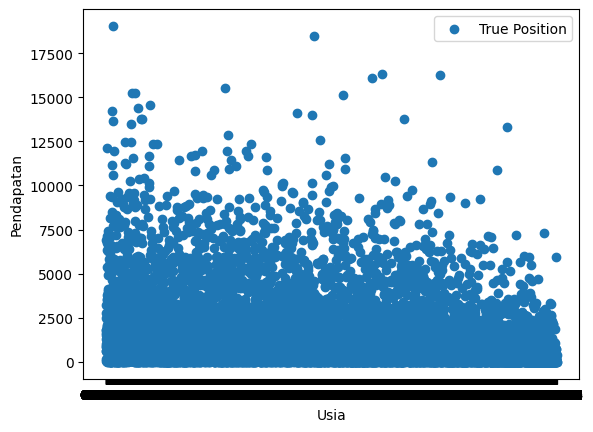

In [5]:
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.legend()

In [8]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                       'TENURE']

X = dataku[numerical_features].values

# Handle missing values if any
# Replace NaN with the mean of the column
for i in range(X.shape[1]):
    X[:, i] = np.nan_to_num(X[:, i], nan=np.nanmean(X[:, i]))


In [9]:
Kmeans = KMeans(n_clusters=2)
Kmeans.fit(X)


KMeans(n_clusters=2)

In [10]:
print(Kmeans.cluster_centers_)

[[9.51235398e+02 8.60685252e-01 6.32524349e+02 3.32030033e+02
  3.00770021e+02 5.42798465e+02 4.71735119e-01 1.63847172e-01
  3.52724228e-01 1.10390641e-01 2.35229202e+00 1.10895586e+01
  3.05926967e+03 1.03916736e+03 6.20086212e+02 1.54781187e-01
  1.14579796e+01]
 [3.86754406e+03 9.39558784e-01 2.39532474e+03 1.57041775e+03
  8.25299102e+02 2.61657647e+03 5.60262266e-01 3.47462518e-01
  4.08426869e-01 2.28108153e-01 6.61583422e+00 2.83060574e+01
  9.88438074e+03 4.33942751e+03 1.78101977e+03 1.49709180e-01
  1.17401700e+01]]


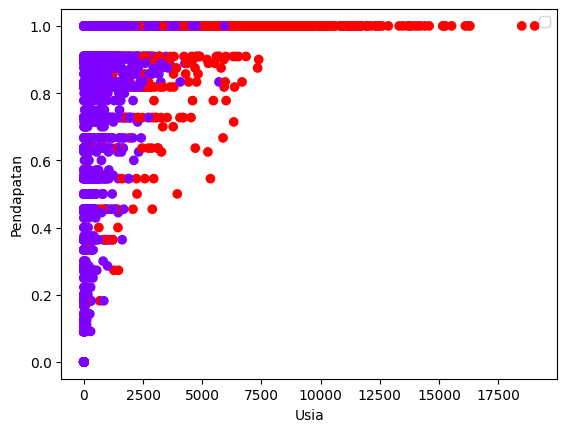

In [11]:
plt.scatter(X[:,0],X[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.legend()
#

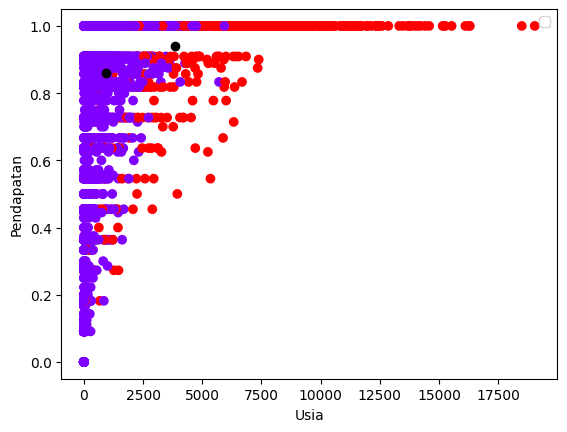

In [12]:
plt.scatter(X[:,0],X[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.legend()
#